The Economic Freedom Index is poised to help readers track over two decades of the advancement in economic freedom, prosperity, and opportunity and promote these ideas in their homes, schools, and communities. The Index covers 12 freedoms – from property rights to financial freedom – in 186 countries. The measurement of economic freedom is based on 12 quantitative and qualitative factors, grouped into four broad categories, or pillars, of economic freedom:

Rule of Law (property rights, government integrity, judicial effectiveness)
Government Size (government spending, tax burden, fiscal health)
Regulatory Efficiency (business freedom, labor freedom, monetary freedom)
Open Markets (trade freedom, investment freedom, financial freedom)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('economic_freedom_index2019_data.csv', sep=",", encoding='latin-1')

In [0]:
# Первые 5 строк датасета
data.head()

CountryID Country Name      WEBNAME                        Region  \
0          1  Afghanistan  Afghanistan                  Asia-Pacific   
1          2      Albania      Albania                        Europe   
2          3      Algeria      Algeria  Middle East and North Africa   
3          4       Angola       Angola            Sub-Saharan Africa   
4          5    Argentina    Argentina                      Americas   

   World Rank  Region Rank  2019 Score  Property Rights  \
0       152.0         39.0        51.5             19.6   
1        52.0         27.0        66.5             54.8   
2       171.0         14.0        46.2             31.6   
3       156.0         33.0        50.6             35.9   
4       148.0         26.0        52.2             47.8   

   Judical Effectiveness  Government Integrity  ...      Country  \
0                   29.6                  25.2  ...  Afghanistan   
1                   30.6                  40.4  ...      Albania   
2                   36.2                  28.9  ...      Algeria   
3                   26.6                  20.5  ...       Angola   
4                   44.5                  33.5  ...    Argentina   

   Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                   35.5               $69.6                   2.5   
1                    2.9               $36.0                   3.9   
2                   41.5              $632.9                   2.0   
3                   28.2              $190.3                   0.7   
4                   44.1              $920.2                   2.9   

   5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                         2.9                $1,958               8.8   
1                         2.5               $12,507              13.9   
2                         3.1               $15,237              10.0   
3                         2.9                $6,753               8.2   
4                         0.7               $20,876               8.7   

   Inflation (%)  FDI Inflow (Millions)  Public Debt (% of GDP)  
0            5.0                   53.9                     7.3  
1            2.0                1,119.1                    71.2  
2            5.6                1,203.0                    25.8  
3           31.7               -2,254.5                    65.3  
4           25.7               11,857.0                    52.6  

[5 rows x 34 columns]

In [0]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(186, 34)

In [0]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 186


In [0]:
# Список колонок
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [0]:
# Список колонок с типами данных
data.dtypes

CountryID                        int64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2019 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Country                         object
Population (Millions)    

In [0]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CountryID - 0
Country Name - 0
WEBNAME - 0
Region - 0
World Rank - 6
Region Rank - 6
2019 Score - 6
Property Rights - 1
Judical Effectiveness - 1
Government Integrity - 1
Tax Burden - 6
Gov't Spending - 3
Fiscal Health - 3
Business Freedom - 1
Labor Freedom - 2
Monetary Freedom - 2
Trade Freedom - 4
Investment Freedom  - 2
Financial Freedom - 5
Tariff Rate (%) - 4
Income Tax Rate (%) - 3
Corporate Tax Rate (%) - 3
Tax Burden % of GDP - 7
Gov't Expenditure % of GDP  - 4
Country - 0
Population (Millions) - 0
GDP (Billions, PPP) - 1
GDP Growth Rate (%) - 2
5 Year GDP Growth Rate (%) - 3
GDP per Capita (PPP) - 2
Unemployment (%) - 5
Inflation (%) - 4
FDI Inflow (Millions) - 5
Public Debt (% of GDP) - 4


In [0]:
# Основные статистические характеристки набора данных
data.describe()

CountryID  World Rank  Region Rank  2019 Score  Property Rights  \
count  186.000000  180.000000   180.000000  180.000000       185.000000   
mean    93.500000   90.500000    20.538889   60.768333        52.327568   
std     53.837719   52.105662    12.738611   11.255725        19.608526   
min      1.000000    1.000000     1.000000    5.900000         7.600000   
25%     47.250000   45.750000     9.750000   53.950000        37.000000   
50%     93.500000   90.500000    19.500000   60.750000        50.100000   
75%    139.750000  135.250000    31.000000   67.800000        65.900000   
max    186.000000  180.000000    47.000000   90.200000        97.400000   

       Judical Effectiveness  Government Integrity  Tax Burden  \
count             185.000000            185.000000  180.000000   
mean               44.899459             41.470270   77.212778   
std                18.104745             19.793193   13.208314   
min                 5.000000              7.900000    0.000000   
25%                31.000000             27.200000   70.975000   
50%                42.900000             35.500000   78.050000   
75%                54.700000             50.300000   85.425000   
max                92.400000             96.700000   99.800000   

       Gov't Spending  Fiscal Health  ...  Financial Freedom  Tariff Rate (%)  \
count      183.000000     183.000000  ...         181.000000       182.000000   
mean        64.203825      65.996721  ...          48.784530         5.986813   
std         23.150984      31.764160  ...          19.483982         5.533568   
min          0.000000       0.000000  ...           0.000000         0.000000   
25%         51.700000      39.900000  ...          30.000000         2.000000   
50%         68.800000      80.300000  ...          50.000000         4.300000   
75%         82.600000      91.450000  ...          60.000000         8.775000   
max         96.600000     100.000000  ...          90.000000        50.000000   

       Income Tax Rate (%)  Corporate Tax Rate (%)  Tax Burden % of GDP  \
count           183.000000              183.000000           179.000000   
mean             28.183060               23.891257            22.157542   
std              13.374339                8.858207            10.152671   
min               0.000000                0.000000             1.600000   
25%              20.000000               20.000000            14.250000   
50%              30.000000               25.000000            20.700000   
75%              35.000000               30.000000            29.850000   
max              60.000000               50.000000            47.000000   

       Gov't Expenditure % of GDP   GDP Growth Rate (%)  \
count                   182.000000           184.000000   
mean                     33.863736             3.470109   
std                      15.476484             5.835732   
min                      10.600000           -14.000000   
25%                      24.675000             1.800000   
50%                      32.350000             3.200000   
75%                      40.225000             4.650000   
max                     139.200000            70.800000   

       5 Year GDP Growth Rate (%)  Inflation (%)  Public Debt (% of GDP)  
count                  183.000000     182.000000              182.000000  
mean                     2.984153      10.586264               56.469231  
std                      2.926503      80.507501               34.163855  
min                    -16.100000      -0.900000                0.000000  
25%                      1.900000       1.300000               34.950000  
50%                      3.000000       2.750000               49.900000  
75%                      4.450000       5.450000               70.125000  
max                      9.900000    1087.500000              236.400000  

[8 rows x 25 columns]

In [0]:
# Определим уникальные значения для целевого признака
data['Financial Freedom'].unique()

array([10., 70., 30., 40., 60., 90., 80., 50., 20., nan,  0.])

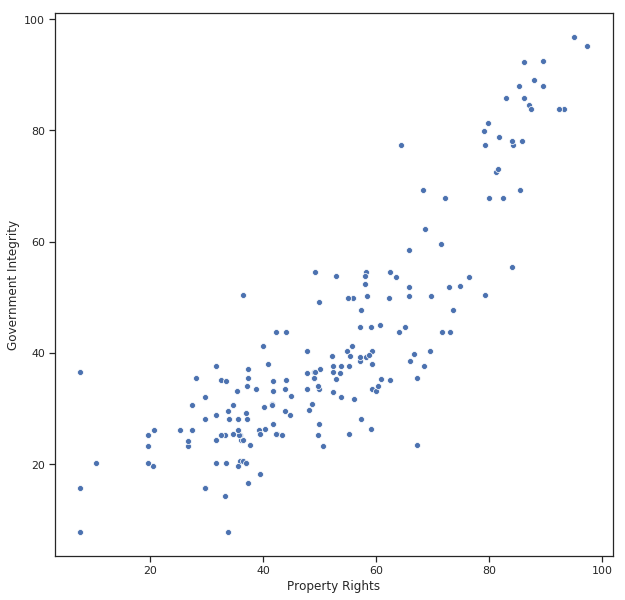

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Property Rights', y='Government Integrity', data=data)

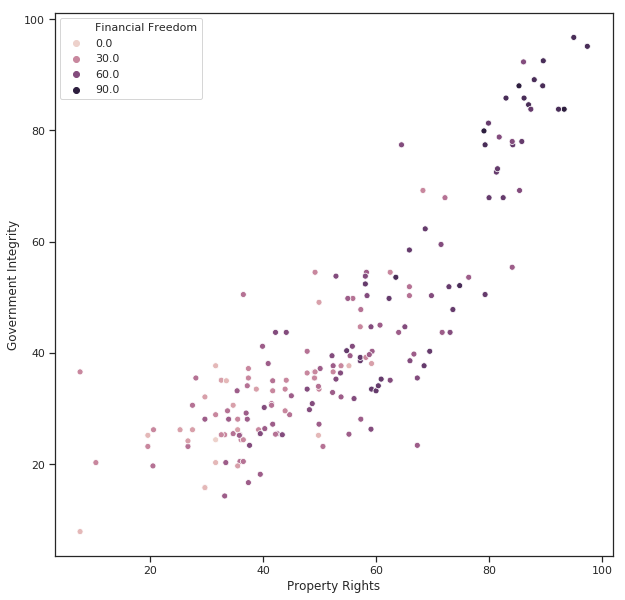

In [0]:

fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Property Rights', y='Government Integrity', data=data, hue='Financial Freedom')

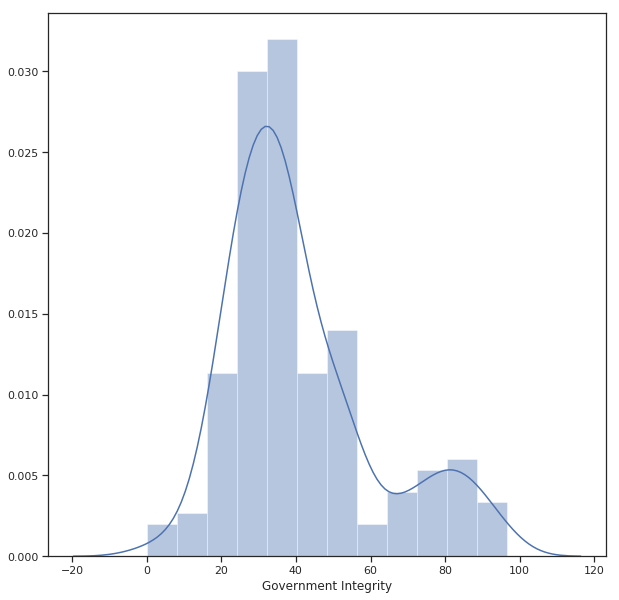

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Government Integrity'].fillna(0))

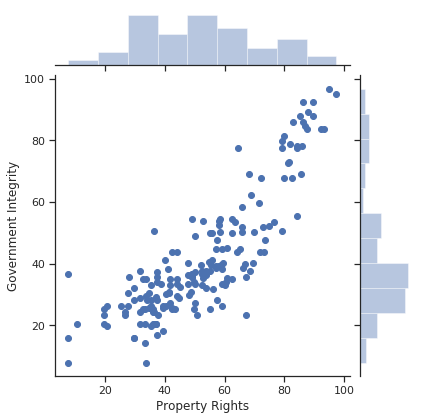

In [0]:
sns.jointplot(x='Property Rights', y='Government Integrity', data=data)

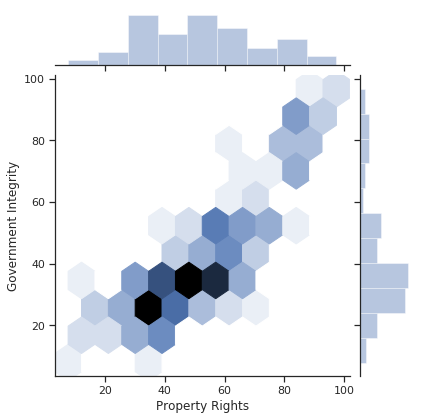

In [0]:
sns.jointplot(x='Property Rights', y='Government Integrity', data=data, kind="hex")

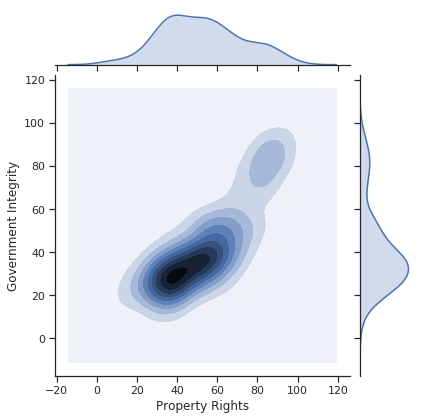

In [0]:
sns.jointplot(x='Property Rights', y='Government Integrity', data=data, kind="kde")

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


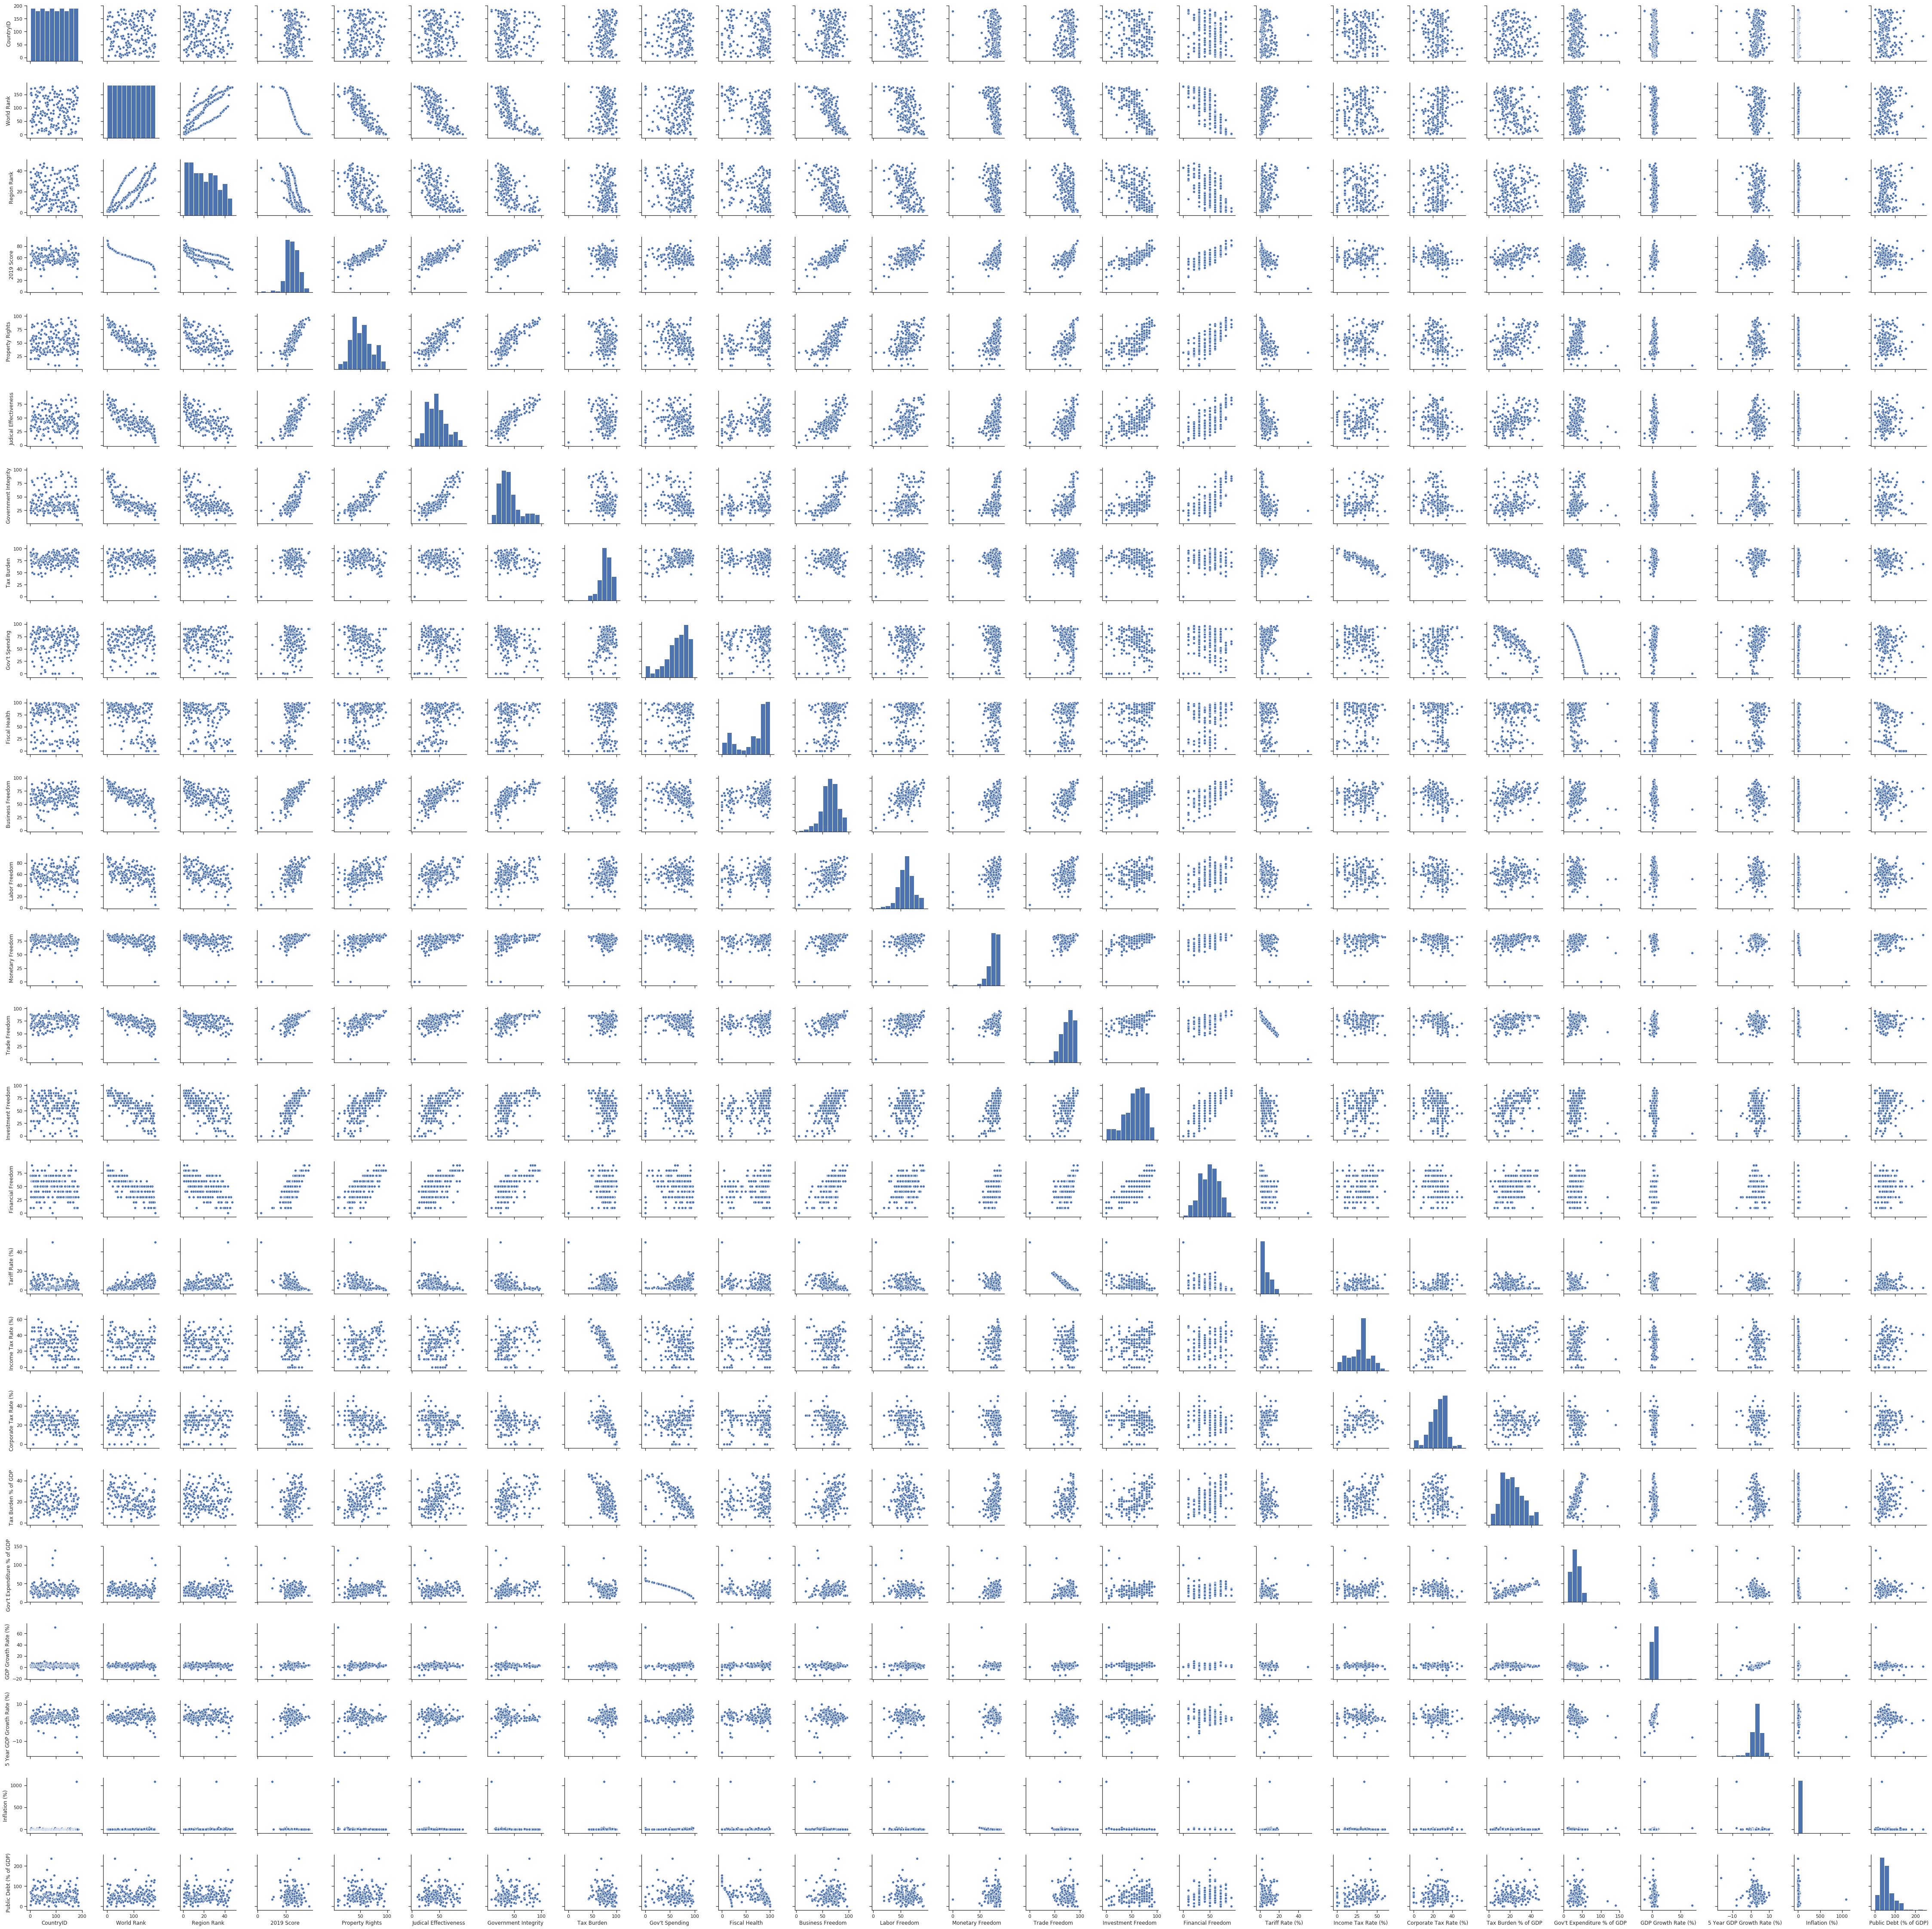

In [0]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


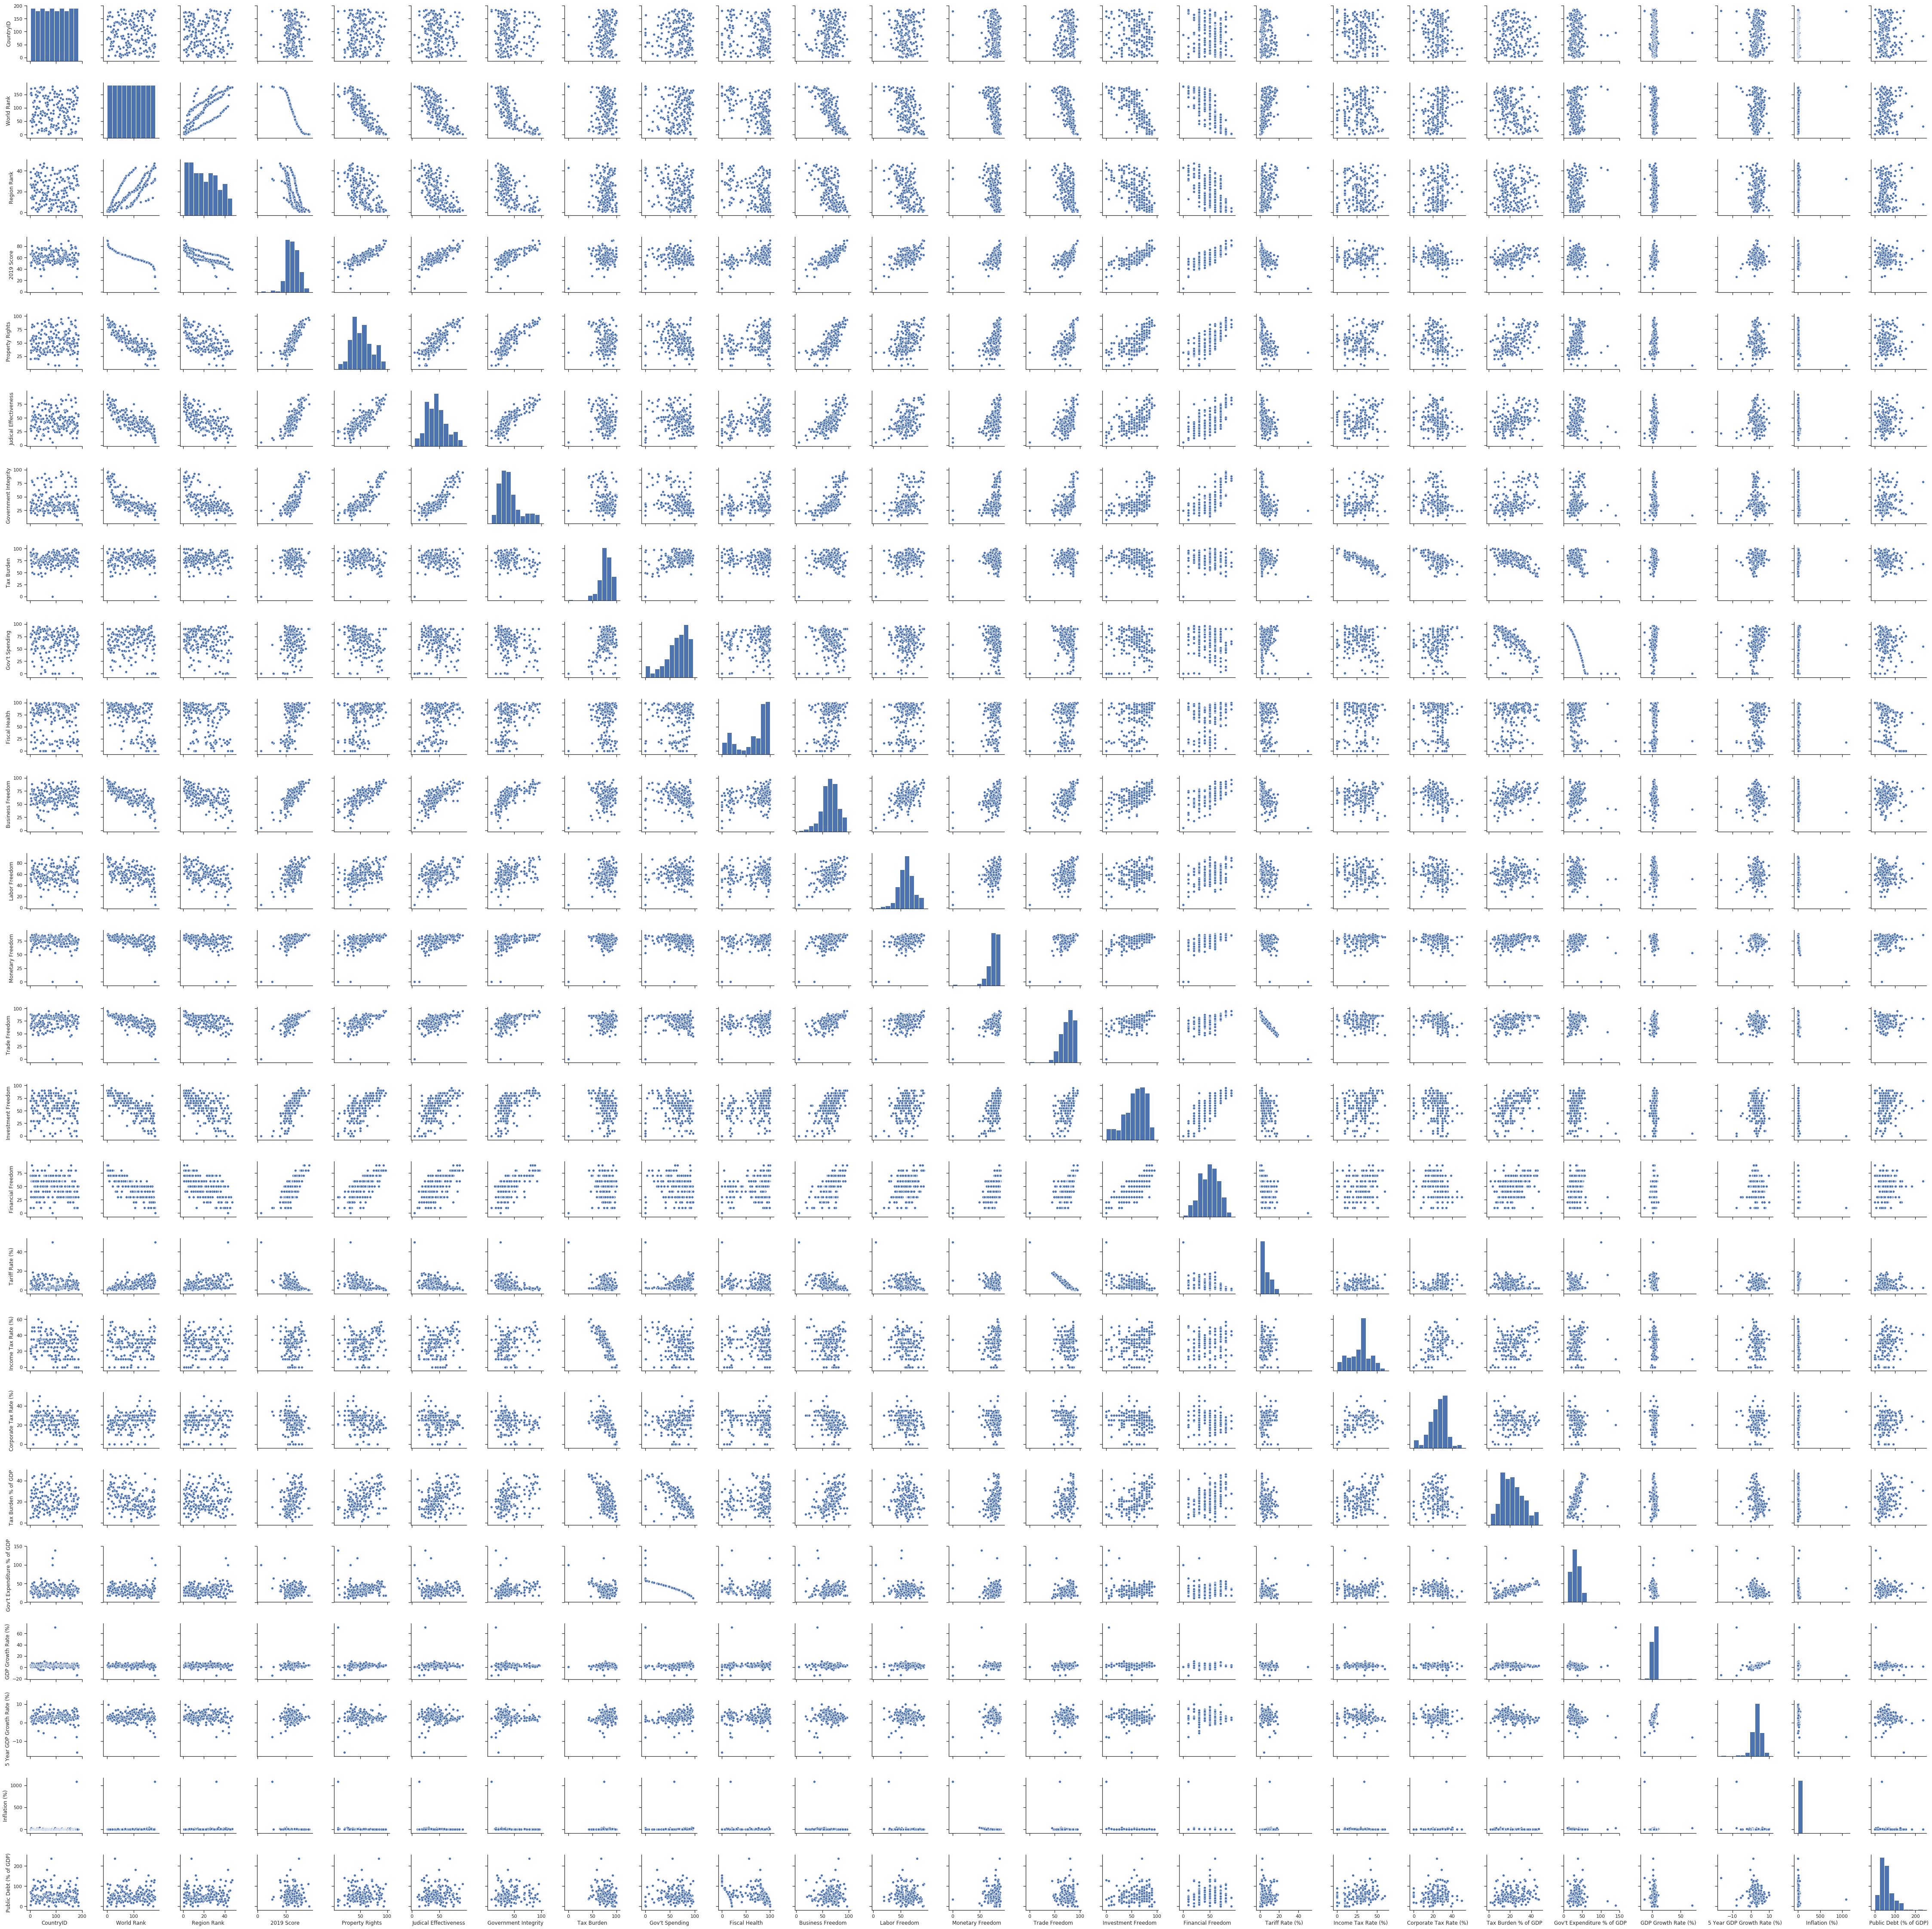

In [0]:
subset1 = ['World Rank', 'Region Rank', '2019 Score']
data[subset1] = data[subset1].astype(float)
#sns.pairplot(data, hue="Financial Freedom")
sns.pairplot(data)
plt.show()

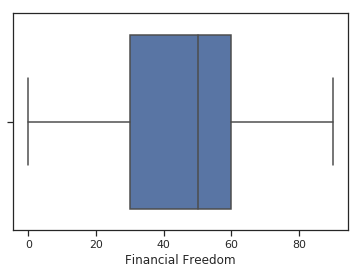

In [0]:
sns.boxplot(x=data['Financial Freedom'])

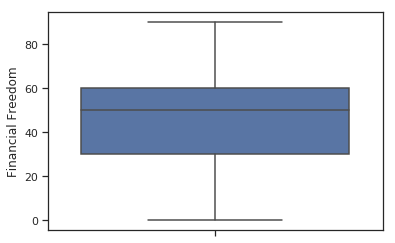

In [0]:
# По вертикали
sns.boxplot(y=data['Financial Freedom'])

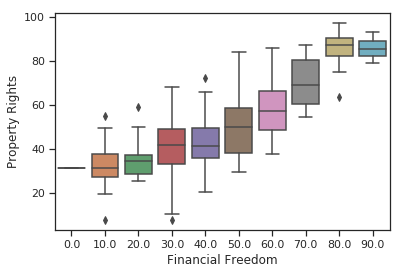

In [0]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Financial Freedom', y='Property Rights', data=data)

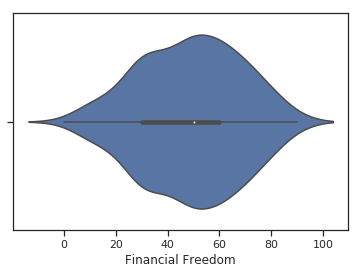

In [0]:
sns.violinplot(x=data['Financial Freedom'])

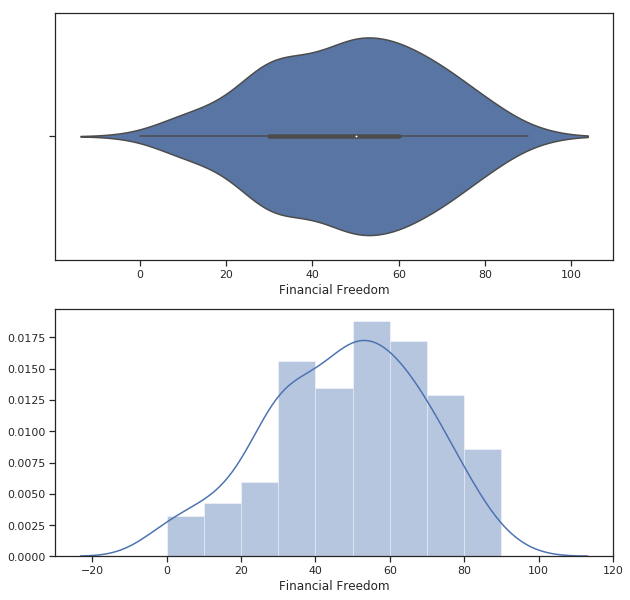

In [0]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Financial Freedom'])
sns.distplot(data['Financial Freedom'].fillna(0), ax=ax[1])

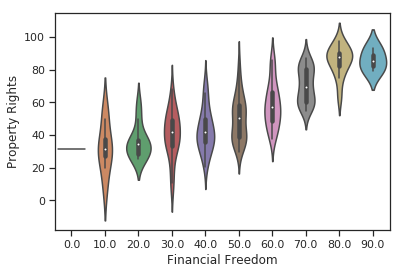

In [0]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='Financial Freedom', y='Property Rights', data=data)

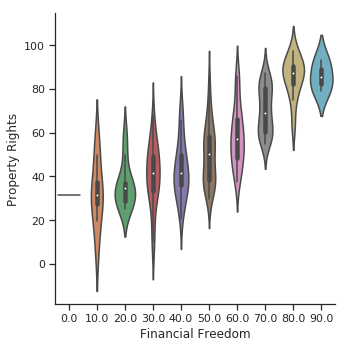

In [0]:
sns.catplot(y='Property Rights', x='Financial Freedom', data=data, kind="violin", split=True)

In [0]:
data.corr()

CountryID  World Rank  Region Rank  2019 Score  \
CountryID                     1.000000   -0.037574    -0.019474    0.037610   
World Rank                   -0.037574    1.000000     0.737060   -0.938328   
Region Rank                  -0.019474    0.737060     1.000000   -0.713517   
2019 Score                    0.037610   -0.938328    -0.713517    1.000000   
Property Rights               0.069558   -0.862262    -0.567211    0.830409   
Judical Effectiveness         0.032246   -0.783510    -0.606432    0.804253   
Government Integrity          0.024981   -0.777058    -0.578832    0.763715   
Tax Burden                    0.112935    0.001651    -0.092319    0.137279   
Gov't Spending                0.024323    0.061147    -0.200618    0.045461   
Fiscal Health                -0.046190   -0.552224    -0.308334    0.563171   
Business Freedom              0.104714   -0.767427    -0.542479    0.812523   
Labor Freedom                 0.018488   -0.500242    -0.438888    0.579635   
Monetary Freedom             -0.105440   -0.511640    -0.365277    0.645076   
Trade Freedom                 0.116976   -0.698677    -0.446179    0.753086   
Investment Freedom           -0.072426   -0.750002    -0.545998    0.754252   
Financial Freedom            -0.117157   -0.782137    -0.594273    0.790032   
Tariff Rate (%)              -0.095527    0.546004     0.326258   -0.636272   
Income Tax Rate (%)          -0.089311   -0.027692    -0.028547    0.009201   
Corporate Tax Rate (%)       -0.142239    0.333975     0.138492   -0.327574   
Tax Burden % of GDP          -0.057784   -0.356061     0.002812    0.298399   
Gov't Expenditure % of GDP   -0.005043   -0.005270     0.209026   -0.129428   
GDP Growth Rate (%)          -0.039135   -0.108975    -0.056843    0.188446   
5 Year GDP Growth Rate (%)   -0.042981    0.004356    -0.095489    0.063560   
Inflation (%)                 0.117721    0.158491     0.087730   -0.276533   
Public Debt (% of GDP)       -0.069724    0.024561     0.077280   -0.036412   

                             Property Rights  Judical Effectiveness  \
CountryID                           0.069558               0.032246   
World Rank                         -0.862262              -0.783510   
Region Rank                        -0.567211              -0.606432   
2019 Score                          0.830409               0.804253   
Property Rights                     1.000000               0.822445   
Judical Effectiveness               0.822445               1.000000   
Government Integrity                0.855428               0.878679   
Tax Burden                         -0.153225              -0.113761   
Gov't Spending                     -0.235260              -0.135135   
Fiscal Health                       0.350158               0.335370   
Business Freedom                    0.776943               0.726369   
Labor Freedom                       0.429934               0.458986   
Monetary Freedom                    0.474246               0.438477   
Trade Freedom                       0.649216               0.566233   
Investment Freedom                  0.665051               0.553842   
Financial Freedom                   0.727224               0.608063   
Tariff Rate (%)                    -0.492647              -0.442519   
Income Tax Rate (%)                 0.155824               0.182569   
Corporate Tax Rate (%)             -0.297578              -0.216257   
Tax Burden % of GDP                 0.485731               0.358283   
Gov't Expenditure % of GDP          0.098852               0.032583   
GDP Growth Rate (%)                -0.074934              -0.022751   
5 Year GDP Growth Rate (%)          0.071906               0.028141   
Inflation (%)                      -0.198389              -0.155026   
Public Debt (% of GDP)              0.096942               0.074158   

                             Government Integrity  Tax Burden  Gov't Spending  \
CountryID                                0.024

In [0]:
data.corr(method='pearson')

CountryID  World Rank  Region Rank  2019 Score  \
CountryID                     1.000000   -0.037574    -0.019474    0.037610   
World Rank                   -0.037574    1.000000     0.737060   -0.938328   
Region Rank                  -0.019474    0.737060     1.000000   -0.713517   
2019 Score                    0.037610   -0.938328    -0.713517    1.000000   
Property Rights               0.069558   -0.862262    -0.567211    0.830409   
Judical Effectiveness         0.032246   -0.783510    -0.606432    0.804253   
Government Integrity          0.024981   -0.777058    -0.578832    0.763715   
Tax Burden                    0.112935    0.001651    -0.092319    0.137279   
Gov't Spending                0.024323    0.061147    -0.200618    0.045461   
Fiscal Health                -0.046190   -0.552224    -0.308334    0.563171   
Business Freedom              0.104714   -0.767427    -0.542479    0.812523   
Labor Freedom                 0.018488   -0.500242    -0.438888    0.579635   
Monetary Freedom             -0.105440   -0.511640    -0.365277    0.645076   
Trade Freedom                 0.116976   -0.698677    -0.446179    0.753086   
Investment Freedom           -0.072426   -0.750002    -0.545998    0.754252   
Financial Freedom            -0.117157   -0.782137    -0.594273    0.790032   
Tariff Rate (%)              -0.095527    0.546004     0.326258   -0.636272   
Income Tax Rate (%)          -0.089311   -0.027692    -0.028547    0.009201   
Corporate Tax Rate (%)       -0.142239    0.333975     0.138492   -0.327574   
Tax Burden % of GDP          -0.057784   -0.356061     0.002812    0.298399   
Gov't Expenditure % of GDP   -0.005043   -0.005270     0.209026   -0.129428   
GDP Growth Rate (%)          -0.039135   -0.108975    -0.056843    0.188446   
5 Year GDP Growth Rate (%)   -0.042981    0.004356    -0.095489    0.063560   
Inflation (%)                 0.117721    0.158491     0.087730   -0.276533   
Public Debt (% of GDP)       -0.069724    0.024561     0.077280   -0.036412   

                             Property Rights  Judical Effectiveness  \
CountryID                           0.069558               0.032246   
World Rank                         -0.862262              -0.783510   
Region Rank                        -0.567211              -0.606432   
2019 Score                          0.830409               0.804253   
Property Rights                     1.000000               0.822445   
Judical Effectiveness               0.822445               1.000000   
Government Integrity                0.855428               0.878679   
Tax Burden                         -0.153225              -0.113761   
Gov't Spending                     -0.235260              -0.135135   
Fiscal Health                       0.350158               0.335370   
Business Freedom                    0.776943               0.726369   
Labor Freedom                       0.429934               0.458986   
Monetary Freedom                    0.474246               0.438477   
Trade Freedom                       0.649216               0.566233   
Investment Freedom                  0.665051               0.553842   
Financial Freedom                   0.727224               0.608063   
Tariff Rate (%)                    -0.492647              -0.442519   
Income Tax Rate (%)                 0.155824               0.182569   
Corporate Tax Rate (%)             -0.297578              -0.216257   
Tax Burden % of GDP                 0.485731               0.358283   
Gov't Expenditure % of GDP          0.098852               0.032583   
GDP Growth Rate (%)                -0.074934              -0.022751   
5 Year GDP Growth Rate (%)          0.071906               0.028141   
Inflation (%)                      -0.198389              -0.155026   
Public Debt (% of GDP)              0.096942               0.074158   

                             Government Integrity  Tax Burden  Gov't Spending  \
CountryID                                0.024

In [0]:
data.corr(method='kendall')

CountryID  World Rank  Region Rank  2019 Score  \
CountryID                     1.000000   -0.020732    -0.018912    0.021512   
World Rank                   -0.020732    1.000000     0.587035   -0.998385   
Region Rank                  -0.018912    0.587035     1.000000   -0.586480   
2019 Score                    0.021512   -0.998385    -0.586480    1.000000   
Property Rights               0.048462   -0.689766    -0.409347    0.691131   
Judical Effectiveness         0.002357   -0.592053    -0.431634    0.592512   
Government Integrity          0.020428   -0.597369    -0.413795    0.598710   
Tax Burden                    0.064388    0.014916    -0.019061   -0.014629   
Gov't Spending                0.002585    0.088842    -0.092325   -0.089110   
Fiscal Health                -0.011548   -0.360342    -0.183682    0.361050   
Business Freedom              0.072497   -0.588104    -0.373841    0.588931   
Labor Freedom                 0.005174   -0.341082    -0.288992    0.342007   
Monetary Freedom             -0.069278   -0.413288    -0.284098    0.413583   
Trade Freedom                 0.058620   -0.580628    -0.330165    0.581441   
Investment Freedom           -0.056318   -0.604028    -0.396927    0.604684   
Financial Freedom            -0.097223   -0.631645    -0.446619    0.632801   
Tariff Rate (%)              -0.034910    0.463634     0.243659   -0.464068   
Income Tax Rate (%)          -0.047714   -0.025534    -0.040632    0.025188   
Corporate Tax Rate (%)       -0.081134    0.279121     0.123137   -0.279774   
Tax Burden % of GDP          -0.027346   -0.254291    -0.017125    0.254455   
Gov't Expenditure % of GDP    0.003404   -0.088437     0.092231    0.088705   
GDP Growth Rate (%)          -0.001794   -0.015563     0.014188    0.016277   
5 Year GDP Growth Rate (%)    0.028101    0.061597    -0.014086   -0.061635   
Inflation (%)                 0.051851    0.266187     0.149220   -0.266433   
Public Debt (% of GDP)       -0.039486    0.020852     0.046132   -0.022019   

                             Property Rights  Judical Effectiveness  \
CountryID                           0.048462               0.002357   
World Rank                         -0.689766              -0.592053   
Region Rank                        -0.409347              -0.431634   
2019 Score                          0.691131               0.592512   
Property Rights                     1.000000               0.614831   
Judical Effectiveness               0.614831               1.000000   
Government Integrity                0.656906               0.693079   
Tax Burden                         -0.073179              -0.103525   
Gov't Spending                     -0.251868              -0.159629   
Fiscal Health                       0.225430               0.172749   
Business Freedom                    0.612965               0.548228   
Labor Freedom                       0.296511               0.287351   
Monetary Freedom                    0.366358               0.301489   
Trade Freedom                       0.547485               0.419403   
Investment Freedom                  0.526019               0.415690   
Financial Freedom                   0.567502               0.442809   
Tariff Rate (%)                    -0.434673              -0.335476   
Income Tax Rate (%)                 0.080869               0.136915   
Corporate Tax Rate (%)             -0.251578              -0.182973   
Tax Burden % of GDP                 0.353827               0.263847   
Gov't Expenditure % of GDP          0.248652               0.155989   
GDP Growth Rate (%)                -0.008570              -0.022732   
5 Year GDP Growth Rate (%)         -0.093503              -0.091284   
Inflation (%)                      -0.228834              -0.192204   
Public Debt (% of GDP)              0.060815               0.057086   

                             Government Integrity  Tax Burden  Gov't Spending  \
CountryID                                0.020

In [0]:
data.corr(method='spearman')

CountryID  World Rank  Region Rank  2019 Score  \
CountryID                     1.000000   -0.036952    -0.026387    0.038118   
World Rank                   -0.036952    1.000000     0.742880   -0.999967   
Region Rank                  -0.026387    0.742880     1.000000   -0.742671   
2019 Score                    0.038118   -0.999967    -0.742671    1.000000   
Property Rights               0.073534   -0.873406    -0.575221    0.873678   
Judical Effectiveness         0.004959   -0.775808    -0.600609    0.775448   
Government Integrity          0.033002   -0.787134    -0.585982    0.787435   
Tax Burden                    0.097121    0.020412    -0.033383   -0.019809   
Gov't Spending               -0.002785    0.123330    -0.135165   -0.123665   
Fiscal Health                -0.014870   -0.499862    -0.260719    0.500275   
Business Freedom              0.110335   -0.780769    -0.523532    0.780741   
Labor Freedom                 0.012556   -0.481415    -0.412300    0.481709   
Monetary Freedom             -0.104761   -0.570502    -0.395443    0.570136   
Trade Freedom                 0.099389   -0.764678    -0.463243    0.764309   
Investment Freedom           -0.077162   -0.776221    -0.538778    0.775822   
Financial Freedom            -0.125890   -0.786296    -0.583926    0.786436   
Tariff Rate (%)              -0.061622    0.637519     0.342912   -0.636974   
Income Tax Rate (%)          -0.066463   -0.039610    -0.055253    0.039080   
Corporate Tax Rate (%)       -0.111647    0.399363     0.169299   -0.400036   
Tax Burden % of GDP          -0.042797   -0.368509    -0.022623    0.368605   
Gov't Expenditure % of GDP    0.011952   -0.123246     0.135187    0.123581   
GDP Growth Rate (%)          -0.001182   -0.022012     0.020790    0.022670   
5 Year GDP Growth Rate (%)    0.041412    0.095426    -0.028883   -0.094817   
Inflation (%)                 0.075594    0.362030     0.210780   -0.361720   
Public Debt (% of GDP)       -0.058764    0.033660     0.064346   -0.034642   

                             Property Rights  Judical Effectiveness  \
CountryID                           0.073534               0.004959   
World Rank                         -0.873406              -0.775808   
Region Rank                        -0.575221              -0.600609   
2019 Score                          0.873678               0.775448   
Property Rights                     1.000000               0.803521   
Judical Effectiveness               0.803521               1.000000   
Government Integrity                0.831379               0.860785   
Tax Burden                         -0.114125              -0.152637   
Gov't Spending                     -0.335471              -0.224588   
Fiscal Health                       0.326148               0.246595   
Business Freedom                    0.808174               0.735875   
Labor Freedom                       0.426234               0.406381   
Monetary Freedom                    0.512135               0.426944   
Trade Freedom                       0.743897               0.592947   
Investment Freedom                  0.697925               0.561792   
Financial Freedom                   0.726744               0.574577   
Tariff Rate (%)                    -0.610302              -0.487938   
Income Tax Rate (%)                 0.119511               0.182595   
Corporate Tax Rate (%)             -0.369019              -0.261350   
Tax Burden % of GDP                 0.484042               0.373819   
Gov't Expenditure % of GDP          0.329920               0.219278   
GDP Growth Rate (%)                -0.009221              -0.031674   
5 Year GDP Growth Rate (%)         -0.136367              -0.133275   
Inflation (%)                      -0.324912              -0.279853   
Public Debt (% of GDP)              0.092025               0.079762   

                             Government Integrity  Tax Burden  Gov't Spending  \
CountryID                                0.033

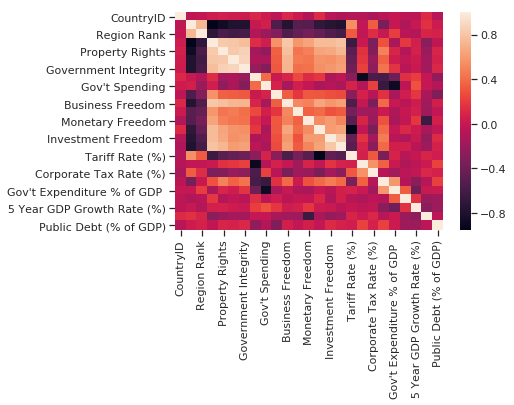

In [0]:

sns.heatmap(data.corr())

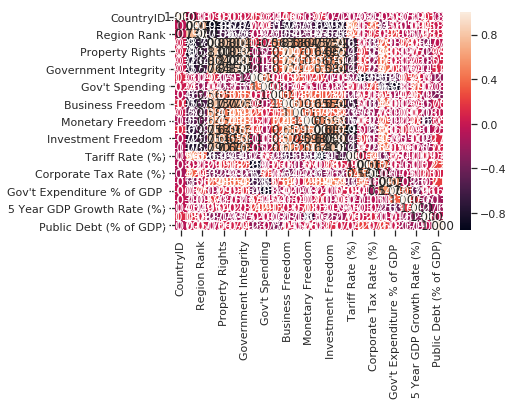

In [0]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

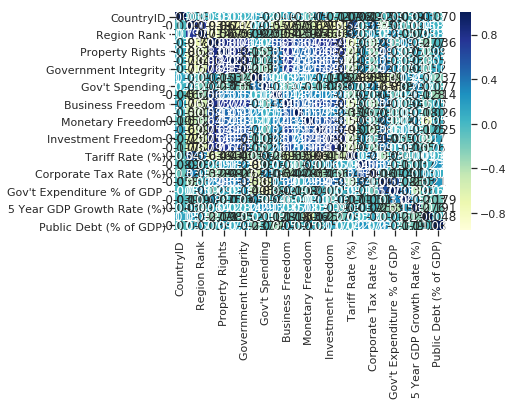

In [0]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

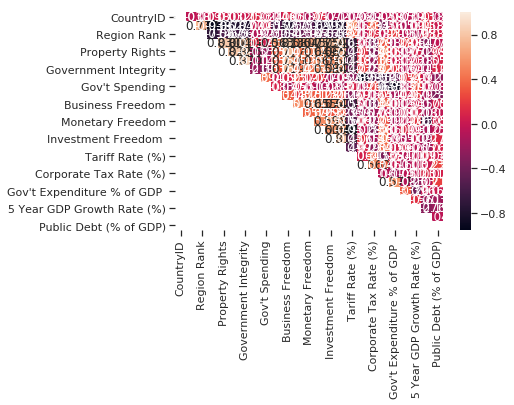

In [0]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

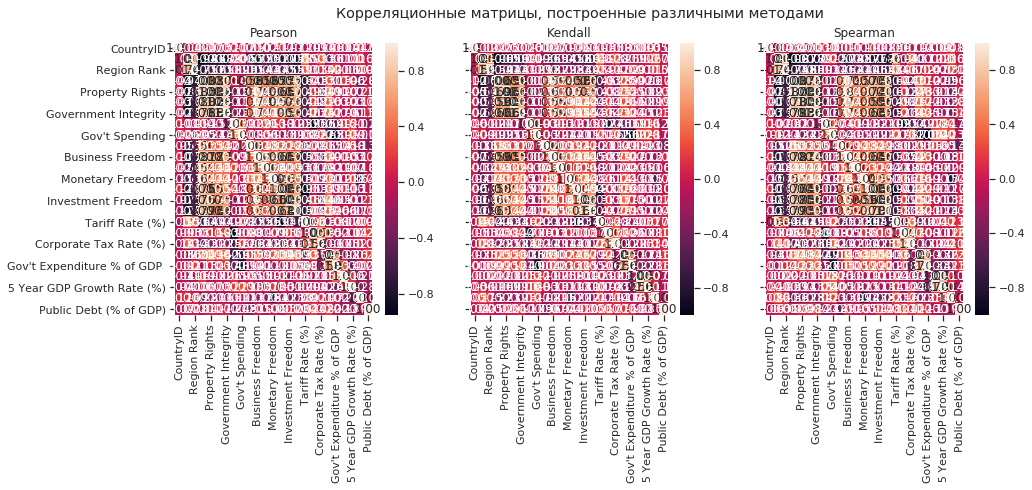

In [0]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')